# FIT5201 Machine Learning Assignment 1 

## Question 1

### Name : Nihaal Ahmed Shibly
### Student ID : 34080864


## KNN Regressor Implementation

In [160]:
#importing necessary libraries

from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

In [161]:
class KnnRegressor(BaseEstimator):
    
    #Class initialistion
    def __init__(self,k): 
        self.k = k
    
    def fit(self, x, y):
        self.y_train_ = y
        self.x_train_kdtree_ = KDTree(x)
        return self

    
    def predict(self, x):
    # Find the k nearest neighbors for each input sample in x
    _, neighbours = self.x_train_kdtree_.query(x, k=self.k)
    
    # Reshape to ensure correct alignment with the input samples
    neighbours = neighbours.reshape(len(x), self.k)
    neighbour_labels = self.y_train_[neighbours]
    
    # Compute the mean of the neighbor labels as predictions
    mean = np.mean(neighbour_labels, axis=1, keepdims=False)

    return mean

In [162]:
from sklearn.datasets import load_diabetes

#Loading the diabates dataset from the scikit learn library and printing features

diabetes = load_diabetes()
diabetes.data.shape, diabetes.target.shape, diabetes.feature_names

((442, 10),
 (442,),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [163]:
#head of the diabetes data 
diabetes.data[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [164]:
#creating training and test data, using random_state = 1 

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, train_size=0.7, random_state=1)

In [165]:
#Arbitrarily using K = 3 as the target variable in the dataset seeks to study quantitatively the disease 
#progression from the baseline after one year. This could low, medium or high progression. 

knn = KnnRegressor(k=3)
knn.fit(x_train, y_train)

predicted_test = knn.predict(x_test)
predicted_train = knn.predict(x_train)



In [184]:
#Defining mean squared error as the parameter to calculate the error in the model

def mse(y, y_hat):
    n = len(y)
    mse = np.mean((y - y_hat) ** 2)    
    return mse

In [185]:
print(f"The train error is {mse(y_train, predicted_train)} and the Test error is {mse(y_test, predicted_test)}")

The train error is 2183.884573894283 and the Test error is 3665.8404344193814


## L Fold Cross Validation Implementation


In [186]:
class LFold:
    
    #Class initialisation
    
    def __init__(self,n_split=5, random_state = 1): 
        self.n_split = n_split
        self.RNG = np.random.default_rng(random_state)
        
    #No of splits
    
    def get_n_splits(self, x=None, y=None, groups=None):
        
        return self.n_split
    
    #Splitting the data and saving the indices to test_idx and train_idx 
    
    def split(self, x=None, y=None, groups=None):
           
        size_each_fold = len(x)//self.n_split
            
        indices = np.arange(len(x))
            
        for i in range(self.n_split):
            
            #For i = 0 and len(x) = 102, l=5, start_test = 0, end_test = 20, test_idx = [0:20],[20:]
            #For i = 3 and len(x) = 102, l=5, start_test = 60, end_test = 80, test_idx = [0:20],[20:]
            #For i = 4 and len(x) = 102, l=5, start_test = 80, end_test = 80, test_idx = [0:20],[20:]
            
            start_test = i * size_each_fold
            
            #towards the end of the data, the test dataset would have lesser number of data based on the remainder
            #  size_each_fold
            
            end_test = (i + 1) * size_each_fold if i < self.n_split - 1 else len(x)
            
            test_idx = indices[start_test:end_test]
            train_idx = np.concatenate([indices[:start_test], indices[end_test:]])
            yield train_idx, test_idx

In [187]:
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print(idx_train, idx_test)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]


In [188]:
def evaluation(max_k, cv):
    
    mse_scorer = make_scorer(mean_squared_error, squared=True)
    reps = cv.get_n_splits()
    
    test_results = np.zeros(shape=(reps, max_k))
    train_results = np.zeros(shape=(reps, max_k))
    
    for k in range(1, max_k+1):
        knn = KnnRegressor(k)
        
        #Cross_validation is a dictionary that contains values like cross_val_score, train_score, test_score etc
        cross_validation = cross_validate(knn, diabetes.data, diabetes.target, cv = cv, return_train_score=True, scoring=mse_scorer)
        
        #The test and train score is assigned to the column corresponding to the index of the k 
        test_results[:, k-1] = cross_validation['test_score']
        train_results[:, k-1] = cross_validation['train_score']
        
    return train_results, test_results
    


reps=5
max_k=30

train_results, test_results = evaluation(max_k, cv=LFold(reps, random_state=0))



The value of K with the best test performance. ie: lowest average mean sqaured error is 16
The value of Mean of the mean squared error is 3178.913676807134
The value of Standard Deviation of the mean squared error is 224.66202555189966


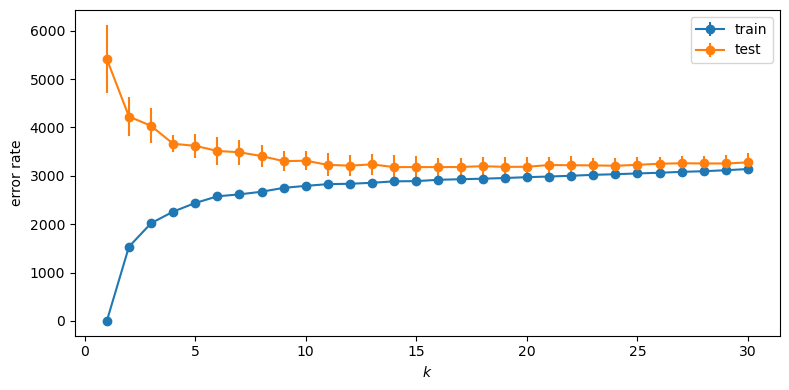

In [191]:
train_mean = np.mean(train_results, axis=0)
train_std = np.std(train_results, axis=0)

# Calculate mean and standard deviation for test results
test_mean = np.mean(test_results, axis=0)
test_std = np.std(test_results, axis=0)
    
best_k_index = np.argmin(test_mean)
best_k_mean = test_mean[best_k_index]
best_k_std = test_std[best_k_index]

# The best k value
best_k = best_k_index + 1 

#Calucalting the standard error of the mean - confidence interval on either side.

confidence_interval_train = 1.96*(train_std)/(np.sqrt(reps))
confidence_interval_test = 1.96*(test_std)/(np.sqrt(reps))

#Numpy array containing the list of possible k's

ks = np.arange(1, max_k+1)
_, axs = plt.subplots(1, figsize=(8,4), tight_layout=True, sharey=True)

axs.errorbar(ks, train_mean, yerr=confidence_interval_train, marker='o', label='train')
axs.errorbar(ks, test_mean, yerr=confidence_interval_test, marker='o', label='test')
axs.legend()
axs.set_xlabel('$k$')
axs.set_ylabel('error rate')


print("The value of K with the best test performance. ie: lowest average mean sqaured error is", best_k)
print("The value of Mean of the mean squared error is", best_k_mean)
print("The value of Standard Deviation of the mean squared error is", best_k_std)


## Automatic Model Selection

In [197]:
from sklearn.base import BaseEstimator


class KnnRegressorCV(BaseEstimator):
    
    #Class initialisation, ks is the list of possible k values for the KNN Regressor, while cv creates a 
    # cross validation with 5 folds.
    
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
        
        self.ks = ks 
        self.cv = cv

    def fit(self, x, y):
        
        #initialising train_results and test_results arrays
        
        train_results = np.zeros((self.cv.get_n_splits(), len(self.ks)))
        test_results = np.zeros((self.cv.get_n_splits(), len(self.ks)))
        
        
        for k in self.ks:
            knn = KnnRegressor(k=k)
            cross_validation = cross_validate(knn, x, y, cv = self.cv,return_train_score=True, 
                                              scoring= make_scorer(mean_squared_error, squared=True))
            #Assigning the test results from crossvaliadtion to the corresponding index of the k value.
            test_results[:, k-1] = cross_validation['test_score']
            train_results[:, k-1] = cross_validation['train_score']
            
        train_mean = np.mean(train_results, axis=0)
        test_mean = np.mean(test_results, axis=0)
        #best k value based on the lest test mean
        self.best_k = np.argmin(test_mean) + 1
        print("The best value of k for the given dataset based on the training error is ",self.best_k)
        
        self.best_knn = KnnRegressor(k=self.best_k)
        self.best_knn.fit(x,y)
        return self
        


    def predict(self, x):
        return self.best_knn.predict(x)
    


In [198]:
knn = KnnRegressorCV(ks=list(range(1,30)),cv=LFold(5))
knn.fit(diabetes.data, diabetes.target)

predicted = knn.predict(diabetes.data)


The best value of k for the given dataset based on the training error is  16


In [215]:
#Internal cross validation based on an outer test - This is achived by creating training and test sets based on
# train_test_split and using just x_train for the cross validation. 

#The value of k changes in each iteration as random_state = None, varying training and test datasets for each split

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, train_size=0.7, random_state=None)

knn = KnnRegressorCV(ks=list(range(1,30)),cv=LFold(5))
knn.fit(x_train, y_train)

predicted_test = knn.predict(x_test)



The best value of k for the given dataset based on the training error is  16


#### Factors that determine whether the internal cross-validation procedure is successful in approximately selecting the best model 

1. If the data is split in a way that each fold within the train set is representative of the entire dataset, the internal crosss validation procedure would be succesful in closely sleected the best model. This can be acheived through stratification during sampling  

2. Amount of data available. If the dataset is originally small, performing an inner cross validation could reduce the amount of data available for each fold, and the model not being able to learn the associations between the data.   

